In [1]:
import pandas as pd

# Corrected URL for the raw CSV file
url = 'https://raw.githubusercontent.com/anmoljaincma/Used_bike_project_2_internship/data_upload/bikes%20-%20bikes.csv'
df = pd.read_csv(url)
df.head()



,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [2]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None


**Data Cleaning**

In [3]:
# Check missing values
print(df.isnull().sum())

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [4]:
#drop missing values rows
df = df.dropna()

Now check again

In [5]:
# check again
print(df.isnull().sum())

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64


In [6]:
#check number of rows
print(len(df))

7796


In [7]:
# Check number of duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
import numpy as np

# Remove invalid values in kms_driven
# Step 1: Convert to string and remove extra spaces
df['kms_driven'] = df['kms_driven'].astype(str).str.strip().str.lower()

# Step 2: Define patterns that indicate invalid values (like "mileage")
df['kms_driven'] = df['kms_driven'].apply(
    lambda x: np.nan if 'mileage' in x else x
)

/tmp/ipython-input-8-2802522369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].astype(str).str.strip().str.lower()
/tmp/ipython-input-8-2802522369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].apply(


In [9]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,NaN,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 km,first owner,bangalore,\n\n,30 bhp,197500


In [10]:
# drop NaN
df.dropna(subset=['kms_driven'], inplace=True)

/tmp/ipython-input-10-404015846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['kms_driven'], inplace=True)


In [11]:
# Check number of rows again
print(len(df))

5816


In [12]:
df.tail()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 km,first owner,ahmedabad,\n\n,16.10 bhp,60000
7852,Yamaha YZF-R15 150cc 2011,2011,7000 km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7854,Bajaj Pulsar 180cc 2016,2016,6407 km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


In [13]:
# Making every value uniform in power column
import re
import numpy as np

def convert_power(value):
    if pd.isna(value):
        return np.nan

    value = str(value).lower().strip()

    # Try extracting from parentheses first
    if '(' in value and ')' in value:
        inner = re.search(r'\((.*?)\)', value)
        if inner:
            val = inner.group(1).strip()
            match = re.search(r'(\d+\.?\d*)\s*(bhp|ps)', val)
            if match:
                number = float(match.group(1))
                unit = match.group(2)
                if unit == 'ps':
                    return round(number * 0.98632, 2)
                elif unit == 'bhp':
                    return round(number, 2)

    # Fallback: search outside parentheses
    match = re.search(r'(\d+\.?\d*)\s*(kw|ps|bhp)', value)
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        if unit == 'kw':
            return round(number * 1.34102, 2)
        elif unit == 'ps':
            return round(number * 0.98632, 2)
        elif unit == 'bhp':
            return round(number, 2)

    return np.nan


In [14]:
df['power'] = df['power'].apply(convert_power)

In [15]:
df.tail(25)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7819,Bajaj Discover 110cc 2015,2015,15625 km,first owner,chennai,\n\n 72 kmpl,8.39,30000
7820,Hero Passion Plus 100cc 2009,2009,2009 km,fourth owner or more,anantnag,\n\n 55 kmpl,7.50,23000
7823,TVS Star City 110cc 2012,2012,92466 km,first owner,chennai,\n\n 85 kmpl,8.20,18000
7824,Hero Passion Pro 100cc 2014,2014,45000 km,first owner,chennai,\n\n 5 kmpl,8.20,32000
7825,Bajaj Pulsar 220cc 2016,2016,15112 km,first owner,coimbatore,\n\n 38 kmpl,21.00,65000
7827,Yamaha YZF-R15 150cc 2014,2014,0 km,first owner,faridabad,\n\n 42 kmpl,16.00,70000
7828,Bajaj Pulsar AS150 2016,2016,9000 km,first owner,patna,\n\n 53 kmpl,16.80,60000
7829,Hero Passion Plus 100cc 2005,2005,20102 km,first owner,delhi,\n\n 55 kmpl,7.50,17000
7831,Hero CD Deluxe 100cc 2004,2004,18446 km,first owner,pune,\n\n 65 kmpl,7.70,20000
7832,Bajaj Discover 135cc 2009,2009,18000 km,first owner,delhi,\n\n,12.93,21000


In [16]:
convert_power("6.16kW (8.36Ps)")

8.25

In [17]:
# Repalce '0' price values by nan
df['price'] = df['price'].replace(0, np.nan)

In [18]:
print(df['price'].isna().sum())      # Number of nulls now
print((df['price'] == 0).sum())      # Should be 0

26
0


In [19]:
df.dropna(subset=['price'], inplace=True)

In [20]:
print(len(df))

5790


In [21]:
import re
import numpy as np

def clean_mileage(value):
    try:
        value = str(value).lower().strip()

        # Handle ranges like '45-55' or '45-55 kmpl'
        if '-' in value:
            parts = re.findall(r'\d+\.?\d*', value)
            if len(parts) == 2:
                avg = (float(parts[0]) + float(parts[1])) / 2
                return round(avg, 2)

        # Handle single numeric value like '35 kmpl', '63kmpl'
        match = re.search(r'(\d+\.?\d*)', value)
        if match:
            return float(match.group(1))

        # If no valid numeric info found
        return np.nan

    except:
        return np.nan


In [22]:
df['mileage'] = df['mileage'].apply(clean_mileage)

In [23]:
df.dropna(subset=['mileage'], inplace=True)

In [24]:
print(len(df))

5058


In [25]:
df = df[df['mileage'] >= 10]

In [26]:
df['kms_driven'] = df['kms_driven'].astype(str).str.replace(',', '')
df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)').astype(float)
df = df[df['kms_driven'] > 500]

/tmp/ipython-input-26-1731589915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].astype(str).str.replace(',', '')
/tmp/ipython-input-26-1731589915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.extract(r'(\d+)').astype(float)


In [27]:
len(df)

4927

In [28]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0
5,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400.0
6,Bajaj Pulsar 180cc 2016,2016,19718.0,first owner,bangalore,65.0,17.0,55000.0


In [29]:
 print(df.describe())

        model_year      kms_driven      mileage       power         price
count  4927.000000     4927.000000  4927.000000  4913.00000  4.927000e+03
mean   2015.218186    24091.975036    42.462371    22.10055  1.157833e+05
std       3.682277    29504.115231    15.266764    16.39909  1.416606e+05
min    1970.000000      550.000000    12.000000     7.00000  2.000000e+03
25%    2014.000000     9830.500000    35.000000    14.20000  4.500000e+04
50%    2016.000000    18000.000000    40.000000    19.80000  8.300000e+04
75%    2018.000000    30582.500000    53.000000    24.60000  1.344000e+05
max    2021.000000  1000000.000000    95.000000   197.30000  1.900000e+06


In [30]:
df[df['power'].isnull()]


,model_name,model_year,kms_driven,owner,location,mileage,power,price
405,KTM RC 125CC 2019,2019,12000.0,first owner,jalandhar,42.5,NaN,165000.0
1045,KTM RC 125CC 2020,2020,5000.0,first owner,delhi,42.5,NaN,152000.0
1353,KTM RC 125CC 2020,2020,89000.0,fourth owner or more,bangalore,42.5,NaN,72000.0
1972,KTM RC 125CC 2020,2020,97000.0,fourth owner or more,bangalore,42.5,NaN,68000.0
2321,KTM RC 125CC 2019,2019,8800.0,first owner,mumbai,42.5,NaN,150500.0
2736,KTM RC 125CC 2020,2020,10429.0,first owner,ahmedabad,42.5,NaN,150000.0
2796,KTM RC 125CC 2019,2019,10283.0,first owner,mumbai,42.5,NaN,145250.0
2931,KTM RC 125CC 2020,2020,4200.0,first owner,mumbai,42.5,NaN,165000.0
2937,KTM RC 125CC 2020,2020,8000.0,first owner,mumbai,42.5,NaN,150000.0
3927,KTM RC 125CC 2019,2019,12000.0,first owner,mumbai,42.5,NaN,145250.0


In [31]:
df = df.dropna()

In [32]:
print(df.isnull().sum())

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64


In [33]:
df[df['power'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price


In [34]:
print(df.describe())

        model_year      kms_driven      mileage       power         price
count  4913.000000     4913.000000  4913.000000  4913.00000  4.913000e+03
mean   2015.205984    24103.512518    42.462263    22.10055  1.157123e+05
std       3.680312    29502.033011    15.288505    16.39909  1.418467e+05
min    1970.000000      550.000000    12.000000     7.00000  2.000000e+03
25%    2014.000000     9900.000000    35.000000    14.20000  4.500000e+04
50%    2016.000000    18000.000000    40.000000    19.80000  8.275000e+04
75%    2018.000000    30671.000000    53.000000    24.60000  1.334000e+05
max    2021.000000  1000000.000000    95.000000   197.30000  1.900000e+06


In [35]:
df.to_csv('cleaned_bike_data.csv', index=False)

In [36]:
df.describe(include='object')

,model_name,owner,location
count,4913,4913,4913
unique,1034,4,438
top,Royal Enfield Classic 350cc 2017,first owner,delhi
freq,78,4237,904


In [37]:
len(df)

4913

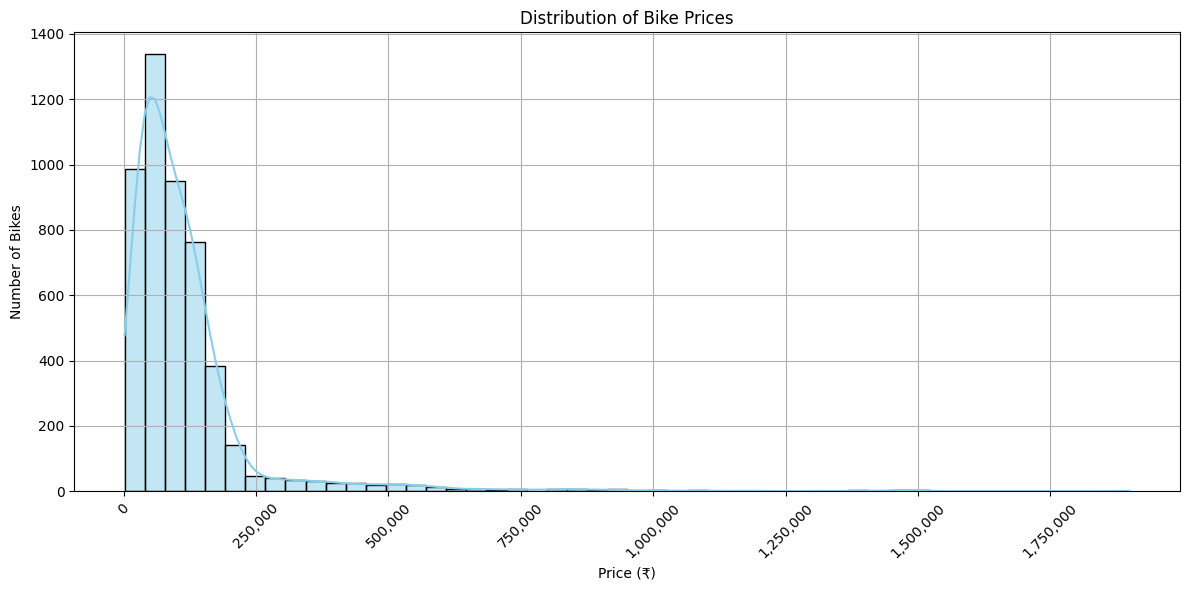

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))  # Make plot wide enough
ax = sns.histplot(data=df, x='price', bins=50, kde=True, color='skyblue')

# Format X-axis with commas (₹ 10,000 instead of 10000)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of Bike Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-39-1996266778.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')


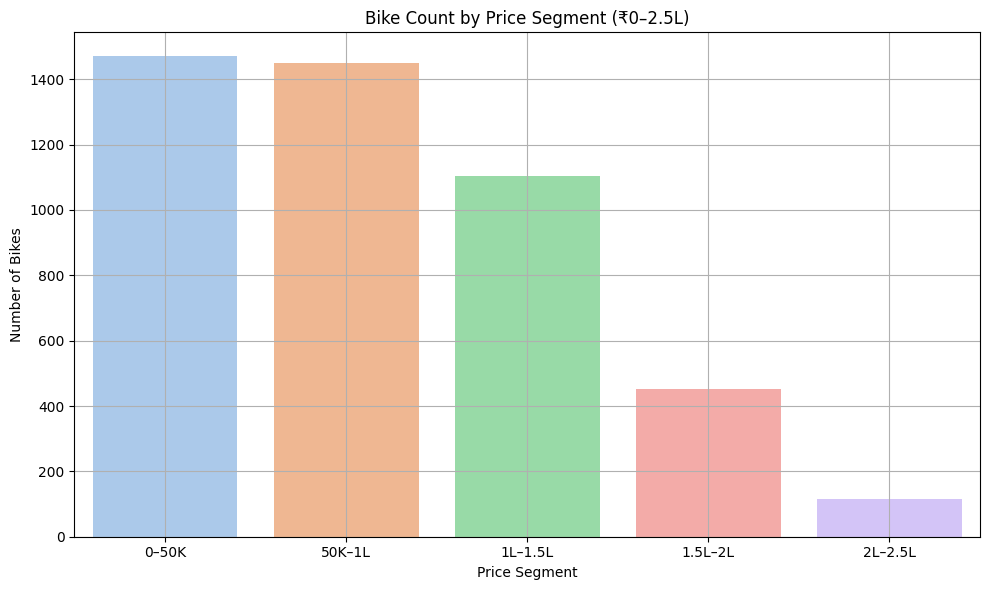

In [39]:

# Step 1: Define bins and labels
bins = [0, 50000, 100000, 150000, 200000, 250000]
labels = ['0–50K', '50K–1L', '1L–1.5L', '1.5L–2L', '2L–2.5L']

# Step 2: Create a new column with price segment
df['price_segment'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Count bikes in each segment
segment_counts = df['price_segment'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='pastel')

plt.title('Bike Count by Price Segment (₹0–2.5L)')
plt.xlabel('Price Segment')
plt.ylabel('Number of Bikes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# 1. Find minimum price
min_price = df['price'].min()
print(f"Minimum price is: ₹{min_price}")
# 2. Find the row(s) with that minimum price
min_price_bikes = df[df['price'] == min_price]
min_price_bikes

Minimum price is: ₹2000.0


,model_name,model_year,kms_driven,owner,location,mileage,power,price,price_segment
6954,Hero CD Deluxe 100cc 2012,2012,35000.0,first owner,dwarka,65.0,7.7,2000.0,0–50K


In [41]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

In [43]:
df['price_outlier'] = ((df['price'] < low) | (df['price'] > high)).astype(int)

Text(0.5, 1.0, 'Price Outliers Highlighted (Red)')

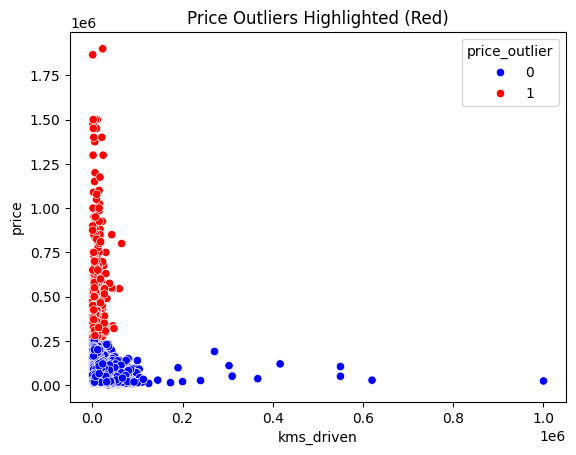

In [44]:
import seaborn as sns

sns.scatterplot(data=df, x='kms_driven', y='price', hue='price_outlier', palette=['blue', 'red'])
plt.title("Price Outliers Highlighted (Red)")


In [45]:
df['price'].skew()

np.float64(5.079409777397478)

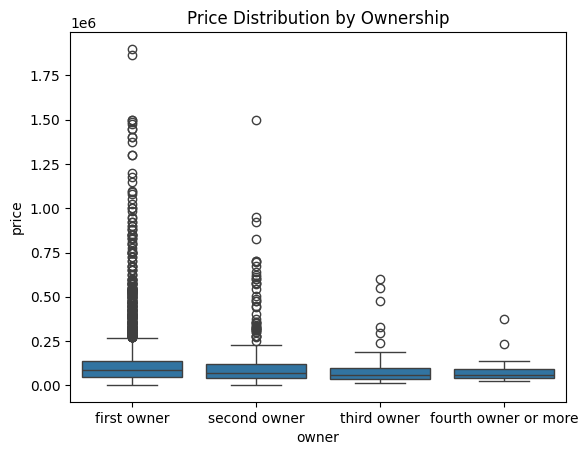

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

owner_order = ['first owner', 'second owner', 'third owner', 'fourth owner or more']

sns.boxplot(
    x='owner',
    y='price',
    data=df,
    order=owner_order
)
plt.title("Price Distribution by Ownership")
plt.show()

In [47]:
df['price_category'] = pd.cut(df['price'], bins=[0, 50000, 300000, df['price'].max()], labels=['Low', 'Medium', 'High'])


In [48]:
df['price_category'].value_counts().sort_index()

,count
price_category,
Low,1470
Medium,3174
High,269


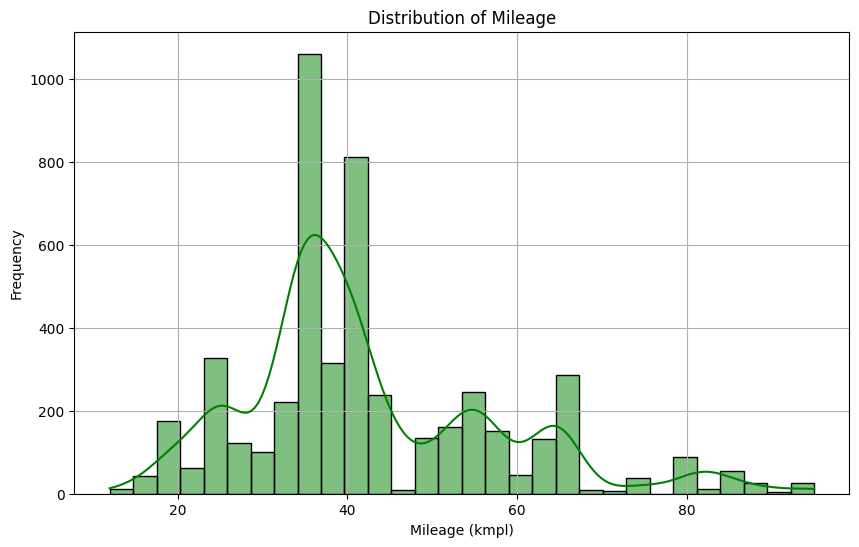

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], bins=30, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


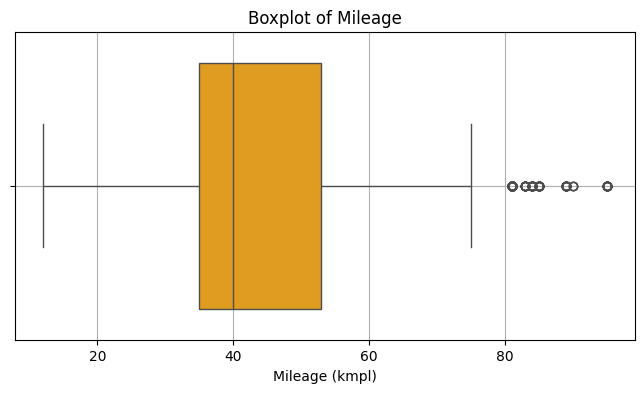

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['mileage'], color='orange')
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage (kmpl)')
plt.grid(True)
plt.show()